In [26]:
import numpy as np
import matplotlib.pyplot as plt

## <center>I.8.19 ##

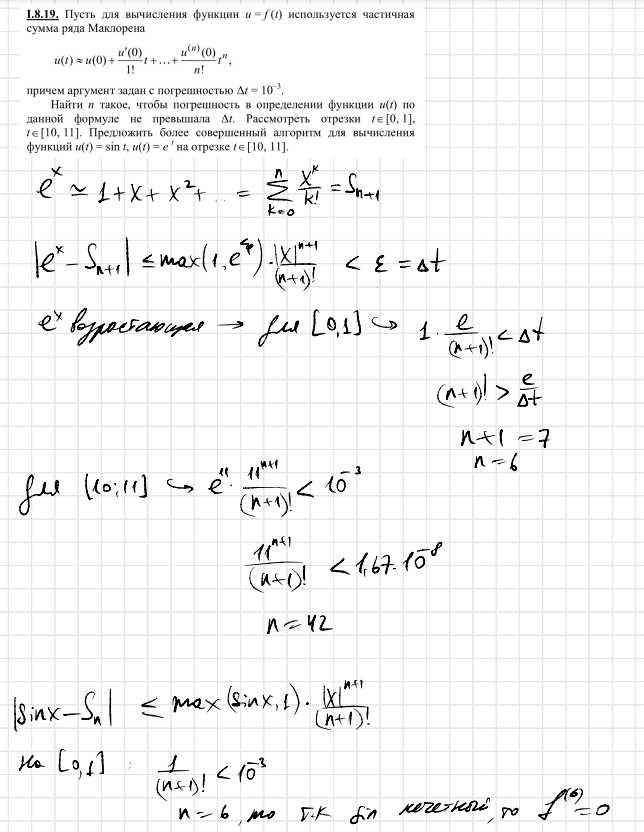

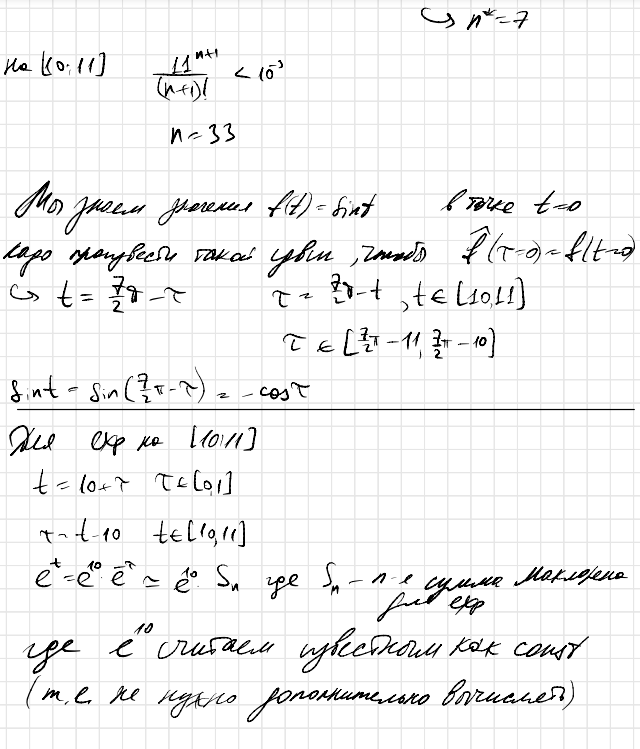

***

## <center>IV.12.8.б 
 Методом простой итерации найти ширину функции на полувысоте с точностью $10^{-3}$ :
$$f(x)=x \exp \left(-x^2\right), \quad x \geq 0 $$
$\space$


$$
\frac{df}{dx} =0 \Leftrightarrow exp(-x^2)-2x^2\cdot exp(-x^2) = 0
$$
$$
x_{argmax} = \frac{1}{\sqrt(2)} \Rightarrow f_{max} = f(\frac{1}{\sqrt(2)}) = \frac{1}{\sqrt(2 e)}
$$

Ширину f на полувысоте определим через нули новой функции. Найдем нули:

In [4]:
A = (1 / (2 * np.sqrt(2 * np.e)))
def func(x):
    """ Функция f с учетом переноса на ее полувысоту"""
    return x * np.exp(-x**2) - A

In [5]:
eps = 10**(-3)
h = 10**(-2)
zeros = np.array([])
x = np.arange(-2, 2, h)

zeros = [val for val in x if (func(val) * func(val + h) <= 0)]
print(np.round(zeros,3))

[0.22 1.35]


Тогда первый отрезок локализации: [0, 0.22] <br>
Второй: [1.35, 2]

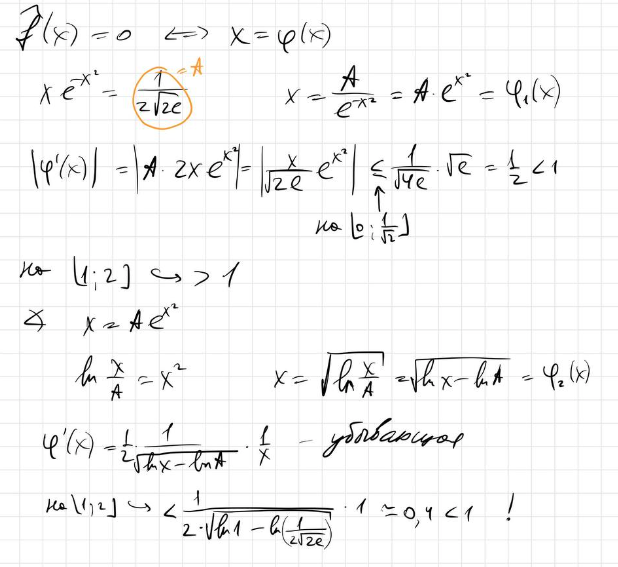

In [6]:
def fi_1(x):
    return np.exp(x**2)*A

def fi_2(x):
    return np.sqrt(np.log(x) - np.log(A))

def mpi(x, fi):
    if abs(fi(x)-x) < eps/2 : #аналог невязки на n-м шаге
    #на 2 делим, так как абсолютная ошибка при вычитании суммируется, значит на каждое из вычисленных значений 
    #нулей может приходится только половина ошибки
        return x
    return mpi(fi(x), fi)

In [7]:
print(f'Ширина функции на полувысоте: {np.round(np.abs(mpi(zeros[0], fi_1) - mpi(zeros[1], fi_2)),2)}')

Ширина функции на полувысоте: 1.13


***


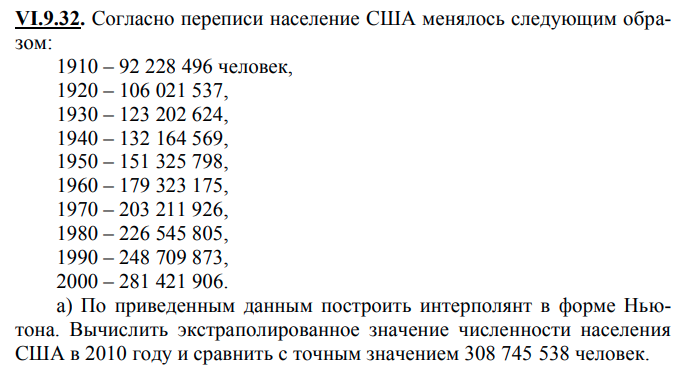<br>
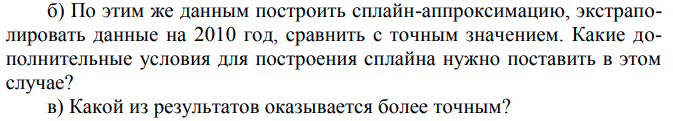

In [38]:
def div_diff(x, f):
    """
    Первая строка полученной матрицы - разности Ньютона увеличивающегося порядка
    """
    
    n = len(x)
    F = np.empty((n, n))
    F[:, 0] = f
    for k in range(1, n):
        F[0:n-k, k] = (F[1:n-k+1, k-1] - F[0:n-k, k-1]) / (x[k:] - x[:-k])
    return F

In [39]:
x = np.arange(1910, 2010, 10)
h = 10
N = x.shape[0] - 1
print(f'число узлов(N+1): {N+1}')

f_people = np.array([92228496, 106021537, 123202624, 132164569,151325798, 179323175, 203211926,226545805,248709873,281421906])
z = 2010
coef = div_diff(x, f_people)[0,:] 

x_diff = [z-key for key in x]
x_diff.insert(0,1)

res_newton = 0
for i, value in enumerate(coef):
    res_newton += value * np.cumprod(x_diff)[i]

print(f'методом Ньютона f({z}): {int(res_newton)}')

число узлов(N+1): 10
методом Ньютона f(2010): 827906509


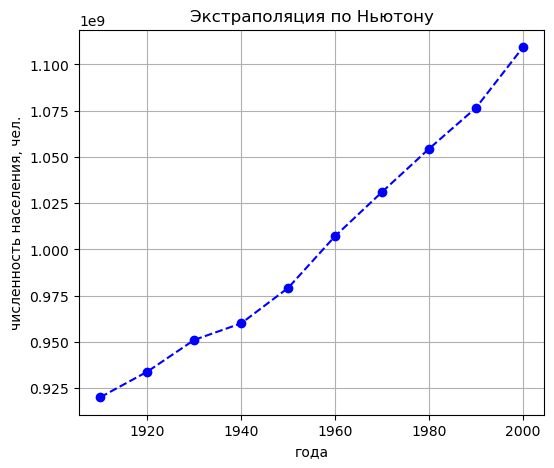

In [48]:
plt.figure(figsize=(6,5))
plt.title('Экстраполяция по Ньютону')
plt.plot(x, f_people + res_newton, '--bo',label='line with marker')
plt.xlabel('года')
plt.ylabel('численность населения, чел.')
plt.yscale('linear')
plt.grid()

Через естественный кубический сплайн:

In [44]:
m = [[0]*(N-1) for _ in range(N-1)]


u_2 = [(f_people[i + 1] - f_people[i]) / h for i in range(N)]
u_3 = [6*(u_2[i + 1] - u_2[i])/ (2*h) for i in range(N-1)]

for i in range(N-1):
  for j in range(N-1):
    if i == j:
      m[i][j] = 2
      if j + 1 < (N-1):
        m[i][j + 1] = 1/2
      if i + 1 < (N-1):
        m[i + 1][j] = 1/2

c = np.linalg.solve(m, u_3)
c = np.append(c,0)

a = f_people[1:]

d = np.array([c[0]/h])
for i in range(1,N):
  d = np.append(d, (c[i] - c[i-1])/h)
  
b = np.array([u_2[0] + c[0]*h/3])
for i in range(1,N):
  b = np.append(b, ((c[i-1] + 2*c[i])*h/6)+ u_2[i])

Сплайн-экстраполяция f(2010): 314133939


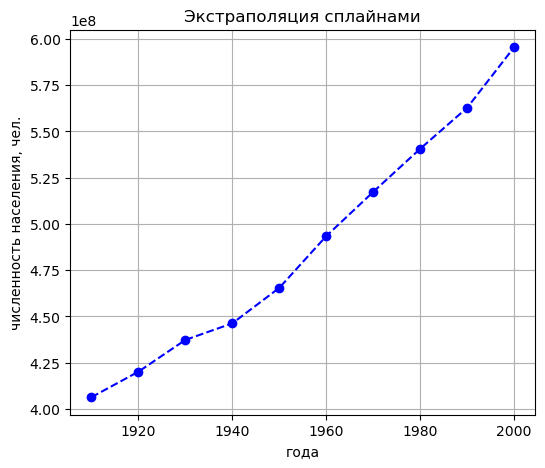

In [47]:
f_z = a[-1] + b[-1]*(z-x[-1]) + (c[-1] * (z - x[-1])**2)/2 + (d[-1] * (z - x[-1])**3)/6
print(f'Сплайн-экстраполяция f({z}): {int(f_z)}')

plt.figure(figsize=(6,5))
plt.title('Экстраполяция сплайнами')
plt.plot(x, f_people + f_z, '--bo',label='line with marker')
plt.xlabel('года')
plt.ylabel('численность населения, чел.')
plt.yscale('linear')
plt.grid()

Таким образом, при экстраполяции сплайнами получили более точный результат
***

## <center>Задача 1
Найти все корни системы уравнений
$$
\left\{\begin{array}{c}
x^2+y^2=1 \\
y=\operatorname{tg} x
\end{array}\right.
$$
С точностью $10^{-6}$. <br>
Примечание: корни отделить графическим методом.

Отделим корни: <br>
$U_1 = \{(x,y): x \in [0.6, 0.7], y \in[0.7, 0.8]\}$ <br>
$U_2 = \{(x,y): x \in [-0.7, -0.6], y \in[-0.8, -0.7]\}$  <br>
Решим методом Ньютона для систем
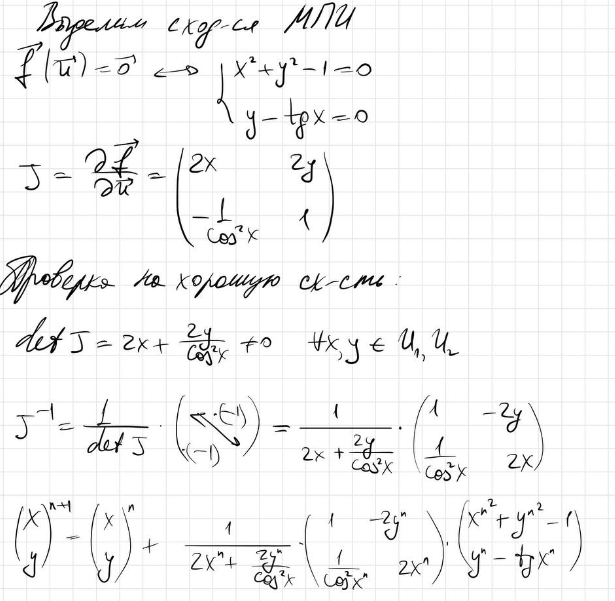


In [27]:
def f(val):
    F = [val[0]**2 + val[1]**2 -1]
    F.append(val[1] - np.tan(val[0]))
    return np.array(F)

def jacob(val):
    J  = [[2*val[0], 2*val[1]]]
    J.append([-1/(np.cos(val[0]))**2, 1])
    return np.array(J)

def newton(val):
    prev = val.copy()
    val -= np.linalg.inv(jacob(val)) @ f(val)
    if np.abs(val - prev).all() < eps:
        print(val)
    else:
        newton(val)

In [28]:
eps = 1e-6
u_1 = np.array([-1.,-1.]) #в качестве начальных точек выберем центры соотв интервалов
newton(u_1)


[-0.64988895 -0.76002918]


## <center>Задача 2
Для сеточной функции в условиях задачи про население вычислить производную в точке 1 с максимально возможной точностью. <br>
$\space$<br>
Решим с помощью метода неопределенных коэффициентов

In [31]:
x = np.arange(1910, 2010, 10)
a = []
for i in range(len(x)):
    a.append(np.arange(0,len(x)) ** i)
b = [0]*len(x)
b[1] = 1
alpha = np.linalg.solve(a, b)
deriv_u = (1/(x[1]-x[0]))*np.sum(alpha*f_people)
print(f'Производная в точке 1: {np.round(deriv_u,2)}')

Производная в точке 1: 2065.97


На сетке из N точек с помощью метода неопределенных коэффициентов всегда можно построить единственную формулу для вычисления производной k-го порядка (k от 1 до N-1) c точностью по крайней мере $O(h^{N-k})$. <br>
Тогда в нашем случае, при сетке на 10 узлах точность первой производной будет $O(h^{9})$

___
### <center>Задача 3 ###
$$
I=\int_0^3 \sin (100 x) \cdot e^{-x^2} \cdot \cos (2 x) d x
$$ 
Отрезок [0,3] разобьем по нулям sin(100x), так как эта функция задает частоту нулей всей подинтегральной функции, нули cos(2x) сюда тоже попадают. <br>
На каждом из полученных отрезков посчитаем интеграл по формуле Симпсона(порядок точности == 4). Просуммируем интегралы по всем отрезкам.

In [35]:
x = [(-1/2) + (3/2)*np.cos((2*m+1)*np.pi/6) for m in range(3)]
print(x)
print([np.cos((2*m+1)*np.pi/6) for m in range(3)])

[0.799038105676658, -0.4999999999999999, -1.799038105676658]
[0.8660254037844387, 6.123233995736766e-17, -0.8660254037844387]


In [36]:
def f2(x):
    h = x[1]-x[0]
    y = x.copy()
    y = np.append((x[1]+x[0])/2, y)
    val = np.sin(100*y) * np.exp(-y**2)*np.cos(2*y)
    return (val[1]+4*val[0]+val[2])*h/6

x = np.arange(0,3, np.pi/100)
x = np.append(x,3) #последняя точка не вошла при фиксированном шагеp

res = []
for i in range(len(x)-1):
    res.append(f2(x[i:i+2]))
    
np.sum(res)

0.010479884266977532